In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Loading the dataset

In [2]:
dataset = sns.load_dataset("iris")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**variety column is the dependent variable that we will classify using the necessary data.**

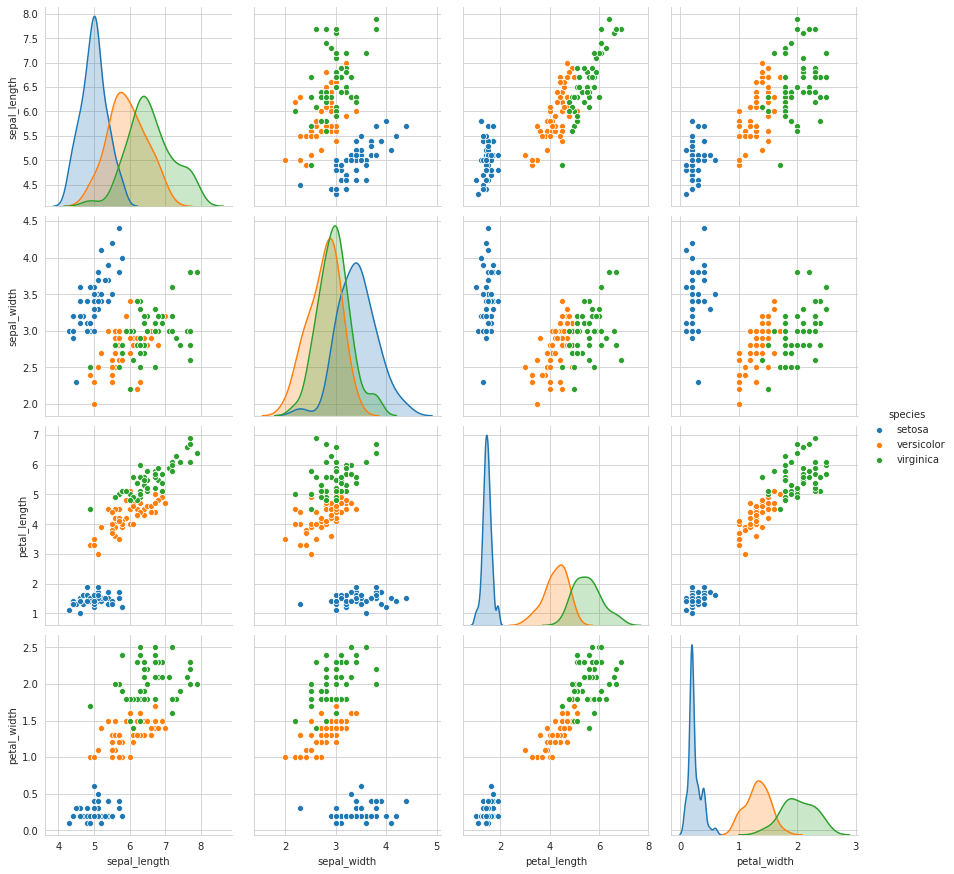

In [4]:
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="species", size=3);
plt.show()

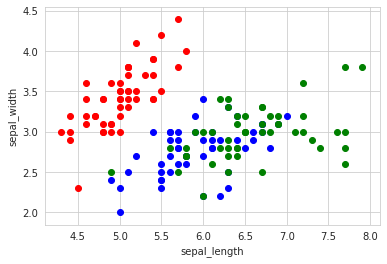

In [5]:
for n in range(0,150):
    if dataset['species'][n] == 'setosa':
        plt.scatter(dataset['sepal_length'][n], dataset['sepal_width'][n], color = 'red')
        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')
    elif dataset['species'][n] == 'versicolor':
        plt.scatter(dataset['sepal_length'][n], dataset['sepal_width'][n], color = 'blue')
        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')
    elif dataset['species'][n] == 'virginica':
        plt.scatter(dataset['sepal_length'][n], dataset['sepal_width'][n], color = 'green')
        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')

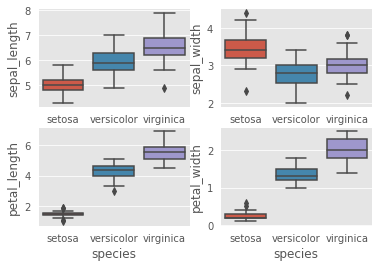

In [6]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.boxplot(x = 'species', y = 'sepal_length', data = dataset)
plt.subplot(2,2,2)
sns.boxplot(x = 'species', y = 'sepal_width', data = dataset)
plt.subplot(2,2,3)
sns.boxplot(x = 'species', y = 'petal_length', data = dataset)
plt.subplot(2,2,4)
sns.boxplot(x = 'species', y = 'petal_width', data = dataset)

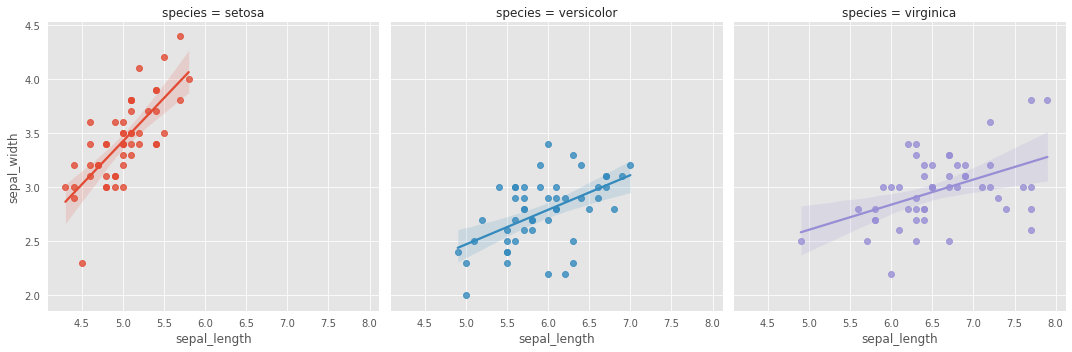

In [7]:
sns.lmplot(x = 'sepal_length', y = 'sepal_width', data = dataset, hue = 'species', col = 'species')

# Preprocessing

**slicing the dataset**

In [8]:
X = dataset.iloc[:,:4].values
y = dataset.iloc[:,4:5].values

**We divide our data set into train and test to verify if our model is working correctly.**


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)


# Modelling

**A small function for easier and easier use of the model. It can make your work quite easy when using more than one model.**

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def model_evaluate(model, test):
    y_pred = model.predict(test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, cmap = 'Blues',fmt = '')
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Logistic Regression

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



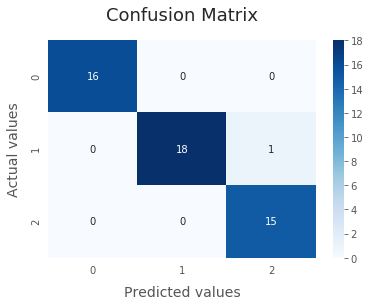

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# Support Vector Classifier

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



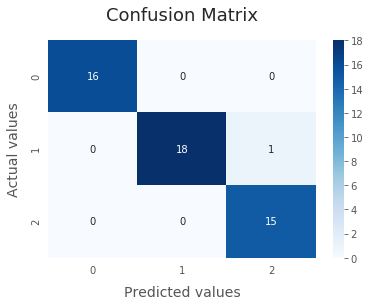

In [13]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear') #kernel = poly, rbf, precomputed
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# Naive Bayes
**Gaussian Naive Bayes**

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.89      0.92        19
   virginica       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



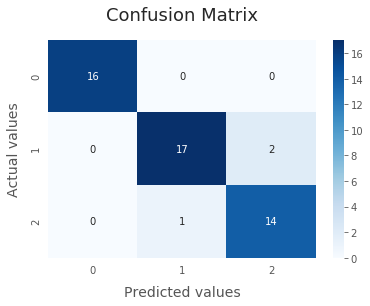

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

model_evaluate(model, X_test)

**Multinomial Naive Bayes**

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.21      0.35        19
   virginica       0.50      1.00      0.67        15

    accuracy                           0.70        50
   macro avg       0.83      0.74      0.67        50
weighted avg       0.85      0.70      0.65        50



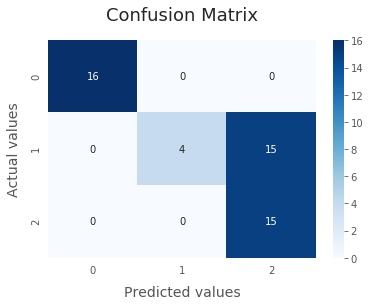

In [15]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

model_evaluate(model, x_test)

**Complement Naive Bayes**

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.00      0.00      0.00        19
   virginica       0.44      1.00      0.61        15

    accuracy                           0.62        50
   macro avg       0.48      0.67      0.54        50
weighted avg       0.45      0.62      0.50        50



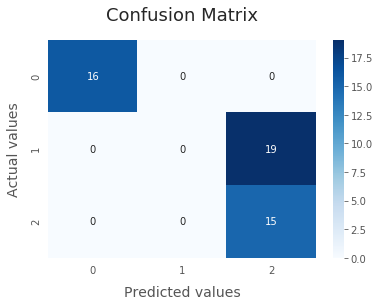

In [16]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(x_train, y_train)

model_evaluate(model, x_test)

**Bernoulli Naive Bayes**

              precision    recall  f1-score   support

      setosa       0.89      1.00      0.94        16
  versicolor       0.83      0.26      0.40        19
   virginica       0.54      0.93      0.68        15

    accuracy                           0.70        50
   macro avg       0.75      0.73      0.67        50
weighted avg       0.76      0.70      0.66        50



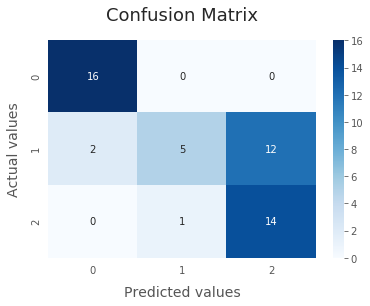

In [17]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)

model_evaluate(model, X_test)

**Categorical Naive Bayes**

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.86      0.95      0.90        19
   virginica       0.92      0.80      0.86        15

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



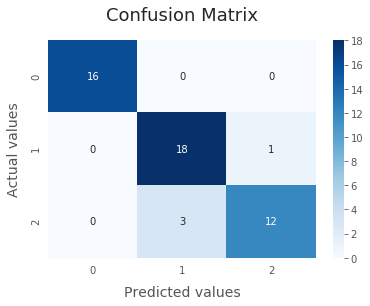

In [18]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(x_train, y_train)

model_evaluate(model, x_test)

# KNeighbors Classifier

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      0.95      0.95        19
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



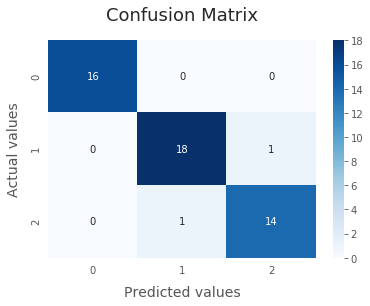

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# Decision Tree Classifier

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



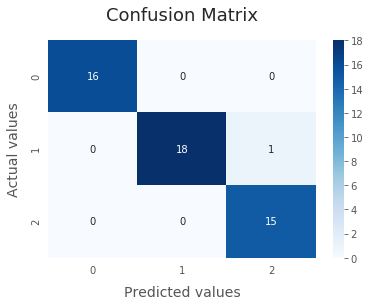

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# Random Forest Classifier

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      0.95      0.95        19
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



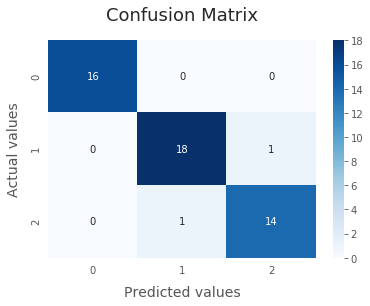

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# AdaBoost

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      0.95      0.95        19
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



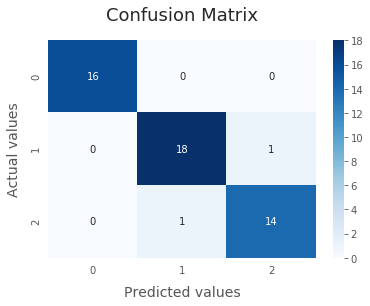

In [22]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators = 50)
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# Other

## XGBClassifier

**if xgboost is not installed**

In [23]:
!pip install xgboost

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



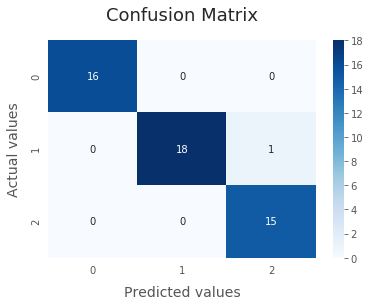

In [24]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 100)
model.fit(X_train, y_train)

model_evaluate(model, X_test)

## ExplainableBoostingClassifier

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



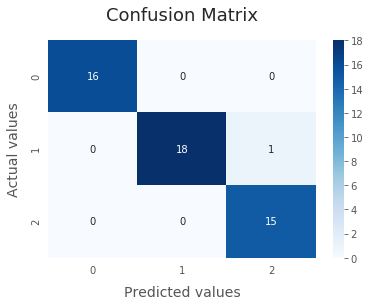

In [25]:
from interpret.glassbox import ExplainableBoostingClassifier
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

model_evaluate(model, X_test)